<a href="https://colab.research.google.com/github/Manlikemurph/fastai-v3/blob/master/Raw_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/fastai/Raw Foods'

In [49]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['adulterated', 'non adulterated', 'models']


In [0]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

In [51]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 316 training images and 79 validation images.


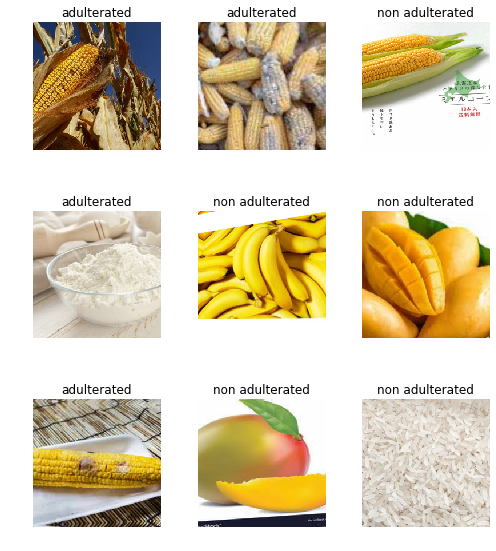

In [52]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [56]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.822770,0.522665,0.253165,00:08
1,0.673635,0.456764,0.202532,00:09
2,0.547785,0.417813,0.177215,00:08
3,0.475956,0.394219,0.151899,00:08


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


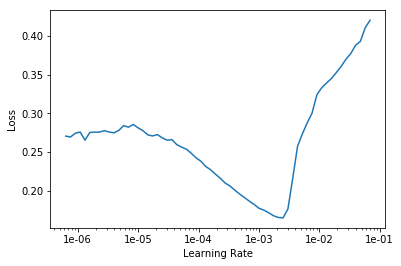

In [61]:
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(2, max_lr=slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.350806,0.337819,0.164557,00:09
1,0.251673,0.305535,0.113924,00:09


In [0]:
learn.save('stage-2')

In [66]:
learn.fit_one_cycle(2, max_lr=slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.150788,0.345504,0.088608,00:08
1,0.112776,0.351554,0.101266,00:08


In [67]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (316 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
adulterated,adulterated,adulterated,adulterated,adulterated
Path: /content/drive/My Drive/fastai/Raw Foods;

Valid: LabelList (79 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
adulterated,non adulterated,adulterated,adulterated,adulterated
Path: /content/drive/My Drive/fastai/Raw Foods;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

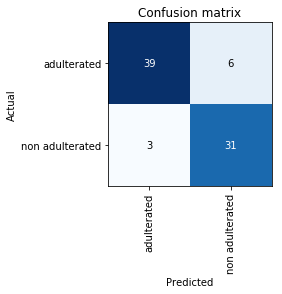

In [70]:
interp.plot_confusion_matrix()

In [71]:
interp.most_confused()

[('adulterated', 'non adulterated', 6), ('non adulterated', 'adulterated', 3)]

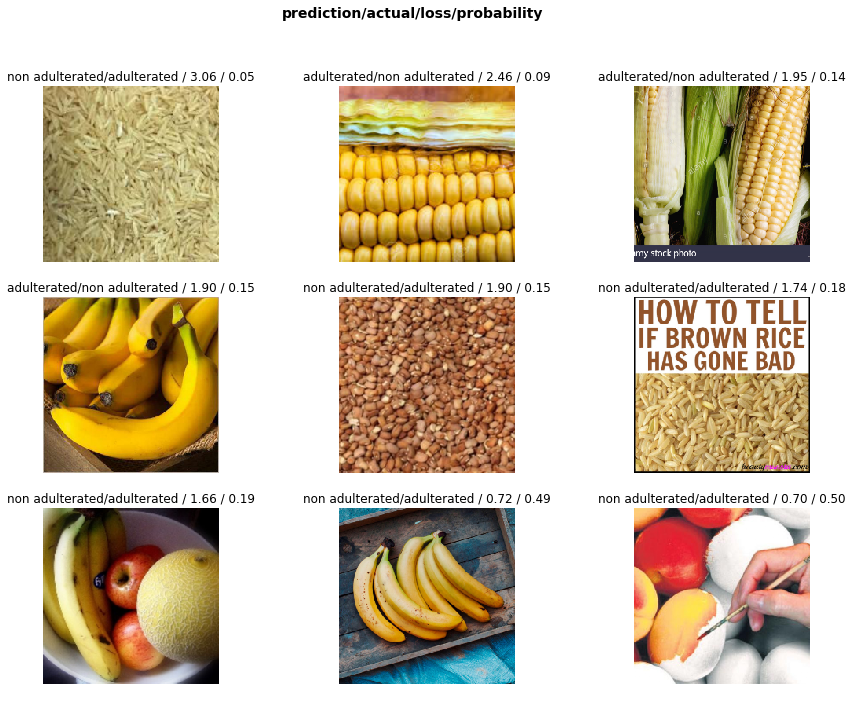

In [73]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

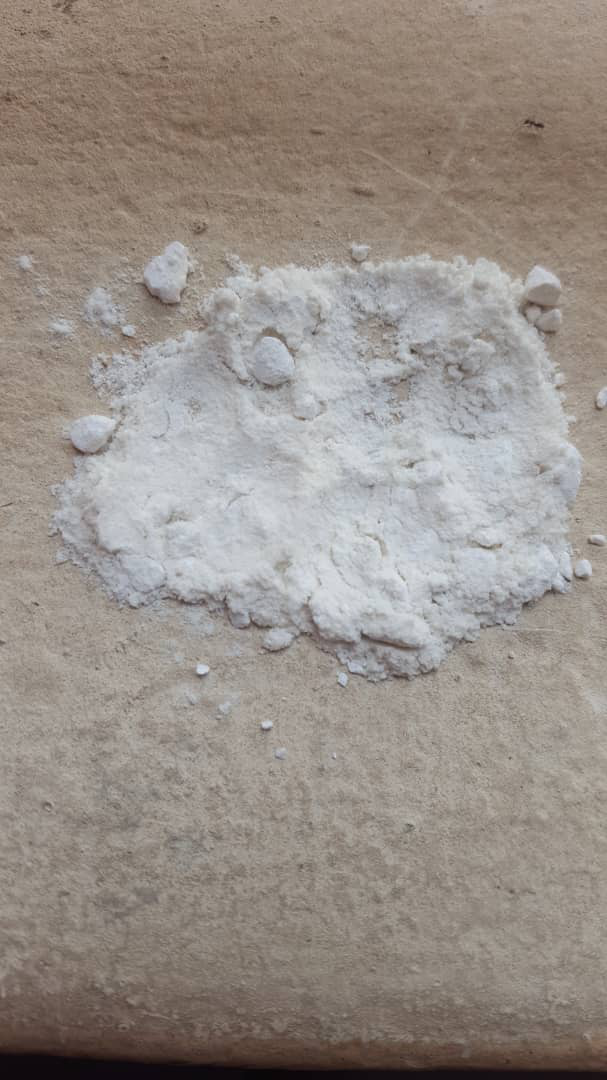

In [77]:
filename = '/content/drive/My Drive/fastai/Test/testtest.jpeg'
img = open_image(filename)
img

In [78]:
pred_class,pred_idx,outputs = learn.predict(img)
print("It is ", pred_class)

It is  non adulterated


In [0]:
learn.export()